-------------------------------------
<h2 style="color:blue;"><b>Perform Excel Tasks in Python (Part II)</b></h2>
<br>
<p style="color:SlateBlue;">In order to append these rows (i.e. sum_row, average_row, max_row, and min_row) , to your dataframe we need to perform some works.</p>
<ul style="color:DodgerBlue;">
    <li>Transpose the data</li>
    <li>Convert to DataFrame (so it is easier to concatenate onto existing data)</li>
    <li>Append to existing data</li>
    <li>Reneame the row with meaningful name</li>
    </ul>
    
--------------------------------------    


In [1]:
## append a new row (sum) to the dataframe
import pandas as pd

sData = pd.read_excel('StudentData.xlsx')   ## read the excel file into sData
sumRow = sData[["Exercise", "Assignment", "Mid-term", "Exam"]].sum()
print(sumRow, "\n")

dfSum = pd.DataFrame(data=sumRow).T             # transpose
print(dfSum, "\n")

dfSum = dfSum.reindex(columns=sData.columns)    # convert to dataFrame
dfNew = sData.append(dfSum, ignore_index=False) # append to existing data
dfNew = dfNew.rename(index={0:"Sum"})           # rename the row as Sum
print(dfNew.tail(6))


Exercise      7039
Assignment    6983
Mid-term      6883
Exam          8048
dtype: int64 

   Exercise  Assignment  Mid-term  Exam
0      7039        6983      6883  8048 

        SID    Name  DOM  Exercise  Assignment  Mid-term  Exam
95   B95677     Ava  6.0        72          85        66    62
96   B79507    Levi  2.0        56          93        64    95
97   B92485    Lily  2.0        55          47        86    63
98   B76960    Maya  1.0        71          58        56    74
99   B79775  Peyton  7.0        83          59        83    76
Sum     NaN     NaN  NaN      7039        6983      6883  8048


In [2]:
## append more new rows (sum and mean) to the dataframe
import pandas as pd

sData = pd.read_excel('StudentData.xlsx')   ## read the Excel file into sData
sumRow = sData[["Exercise", "Assignment", "Mid-term", "Exam"]].sum()
meanRow = sData[["Exercise", "Assignment", "Mid-term", "Exam"]].mean()

dfSum = pd.DataFrame(data=sumRow).T             # transpose
dfSum = dfSum.reindex(columns=sData.columns)    # convert to dataFrame
dfNew = sData.append(dfSum, ignore_index=False) # append to existing data
dfNew = dfNew.rename(index={0:"Sum"})           # rename the row as Sum
print(dfNew.tail(), "\n")

dfMean = pd.DataFrame(data=meanRow).T            # transpose
dfMean = dfMean.reindex(columns=dfNew.columns)   # convert to dataFrame
dfNew = dfNew.append(dfMean, ignore_index=False) # append to existing data
dfNew = dfNew.rename(index={0:"Average"})        # rename the row as Sum
print(dfNew.tail())


        SID    Name  DOM  Exercise  Assignment  Mid-term  Exam
96   B79507    Levi  2.0        56          93        64    95
97   B92485    Lily  2.0        55          47        86    63
98   B76960    Maya  1.0        71          58        56    74
99   B79775  Peyton  7.0        83          59        83    76
Sum     NaN     NaN  NaN      7039        6983      6883  8048 

            SID    Name  DOM  Exercise  Assignment  Mid-term     Exam
97       B92485    Lily  2.0     55.00       47.00     86.00    63.00
98       B76960    Maya  1.0     71.00       58.00     56.00    74.00
99       B79775  Peyton  7.0     83.00       59.00     83.00    76.00
Sum         NaN     NaN  NaN   7039.00     6983.00   6883.00  8048.00
Average     NaN     NaN  NaN     70.39       69.83     68.83    80.48


-----------------------
<h4 style="color:SlateBlue";>Create your dataframe on the run</h4>
           
--------------------------

In [3]:
## Create your dataframe on the run
import pandas as pd

## Define dictionary used to create our DataFrame
dt = {"A": [10, 11, 12, 13, None],
      "B": [20, 21, None, 23, 24],
      "C": [30, None, 32, 33, 34],
      "D": [40, 41, 42, 43, 44],
      "E": [50, 51, None, None, 54]}

## Create default dataframe
df = pd.DataFrame(dt)
print(df)


      A     B     C   D     E
0  10.0  20.0  30.0  40  50.0
1  11.0  21.0   NaN  41  51.0
2  12.0   NaN  32.0  42   NaN
3  13.0  23.0  33.0  43   NaN
4   NaN  24.0  34.0  44  54.0


--------------------
<h4 style="color:SlateBlue;">Manipulation of data in more than one dataframe (i.e. similar task as vlookup in excel).
<br><br>Watch the outcomes that with the different setting of "how".</h4>

------------------------------


In [4]:
## Prepare the two dataframes to demo the link (similar to vLookUp)
import pandas as pd

sData = pd.read_excel('StudentData.xlsx')   ## read the excel file into sData
print(sData.head(), "\n")

# Define dictionary used to create our DataFrame
dt = {"DOM": [1, 2, 3, 4, 5, 6, 7],
      "College": ["Chao Kuang Piu", "Cheng Yu Tung", "Cheong Kun Lun", "Lui Che Woo", \
                  "Shiu Pong", "Choi Kai Yau", "Moon Chun Memorial"]}
cData = pd.DataFrame(dt)
print(cData.head())


      SID     Name  DOM  Exercise  Assignment  Mid-term  Exam
0  B77666      Leo    4        75          69        83    91
1  B97353   Carson    2        75          43        68    79
2  B94131   Harper    6        52          46        95    75
3  B86056     Liam    5        43          43        47    80
4  B95818  Paisley    3        86          44        55    76 

   DOM         College
0    1  Chao Kuang Piu
1    2   Cheng Yu Tung
2    3  Cheong Kun Lun
3    4     Lui Che Woo
4    5       Shiu Pong


In [6]:
# Join the colleges data to the students data, use pandas.merge()

sSimple = sData[["SID", "Name", "DOM"]]    # create a dataframe contain selected columns

## Perform the merge of the two dataframe
student_dom = pd.merge(sSimple, cData, how='left', on='DOM')   # how = left
print(student_dom.head(8), "\n")
print(student_dom.tail(4), "\n")
      

      SID     Name  DOM             College
0  B77666      Leo    4         Lui Che Woo
1  B97353   Carson    2       Cheng Yu Tung
2  B94131   Harper    6        Choi Kai Yau
3  B86056     Liam    5           Shiu Pong
4  B95818  Paisley    3      Cheong Kun Lun
5  B94261   Carter    3      Cheong Kun Lun
6  B79205    Lucas    7  Moon Chun Memorial
7  B82229    Mason    1      Chao Kuang Piu 

       SID    Name  DOM             College
96  B79507    Levi    2       Cheng Yu Tung
97  B92485    Lily    2       Cheng Yu Tung
98  B76960    Maya    1      Chao Kuang Piu
99  B79775  Peyton    7  Moon Chun Memorial 



In [7]:
# Join the colleges data to the students data, use pandas.merge()

sSimple = sData[["SID", "Name", "DOM"]]    # create a dataframe contain selected columns#

## Perform the merge of the two dataframe
student_dom = pd.merge(sSimple, cData, how='right', on='DOM')  # how = right
print(student_dom.head(8), "\n")
print(student_dom.tail(4), "\n")


      SID      Name  DOM      College
0  B77666       Leo    4  Lui Che Woo
1  B77567     Wyatt    4  Lui Che Woo
2  B72915   Gabriel    4  Lui Che Woo
3  B93404   Cameron    4  Lui Che Woo
4  B94018     Logan    4  Lui Che Woo
5  B74890       Mia    4  Lui Che Woo
6  B77688  Benjamin    4  Lui Che Woo
7  B96568     Jacob    4  Lui Che Woo 

       SID    Name  DOM         College
96  B97817   Riley    1  Chao Kuang Piu
97  B73420  Gianna    1  Chao Kuang Piu
98  B82183    Nova    1  Chao Kuang Piu
99  B76960    Maya    1  Chao Kuang Piu 



----------------
<h4 style="color:SlateBlue;">Adding IF Conditions on dataframe column (i.e. determine the grade according to scores using the loc, “|”, and “&”)</h4>

-----------------------------

In [1]:
## Use condition statements to determine the grade accordingly
import pandas as pd

sData = pd.read_excel('StudentData.xlsx')   ## read the Excel file into sData

sData["Scores"] = round(sData["Exercise"] * 0.1 + sData["Assignment"] * 0.2 + \
                  sData["Mid-term"] * 0.3 + sData["Exam"] * 0.4, 0)

## Determine the grade according to the scores
sData.loc[sData['Scores'] >= 90, 'Grade'] = "A"
sData.loc[(sData['Scores'] >= 80) & (sData['Scores'] < 90), 'Grade'] = "B"
sData.loc[(sData['Scores'] >= 70) & (sData['Scores'] < 80), 'Grade'] = "C"
sData.loc[(sData['Scores'] >= 60) & (sData['Scores'] < 70), 'Grade'] = "D"
sData.loc[(sData['Scores'] >= 50) & (sData['Scores'] < 60), 'Grade'] = "E"
sData.loc[sData['Scores'] < 50, 'Grade'] = "F"
print(sData)


       SID     Name  DOM  Exercise  Assignment  Mid-term  Exam  Scores Grade
0   B77666      Leo    4        75          69        83    91    83.0     B
1   B97353   Carson    2        75          43        68    79    68.0     D
2   B94131   Harper    6        52          46        95    75    73.0     C
3   B86056     Liam    5        43          43        47    80    59.0     E
4   B95818  Paisley    3        86          44        55    76    64.0     D
..     ...      ...  ...       ...         ...       ...   ...     ...   ...
95  B95677      Ava    6        72          85        66    62    69.0     D
96  B79507     Levi    2        56          93        64    95    81.0     B
97  B92485     Lily    2        55          47        86    63    66.0     D
98  B76960     Maya    1        71          58        56    74    65.0     D
99  B79775   Peyton    7        83          59        83    76    75.0     C

[100 rows x 9 columns]


--------------------
<h3 style="color:SlateBlue;"><b>Simple Plotting with Pandas Methods</b></h3>

-----------------------------

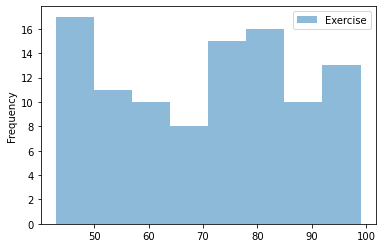

In [8]:
## Use Pandas method to plot a histogram for one single column
import pandas as pd

sData = pd.read_excel('StudentData.xlsx')   ## read the Excel file into sData
sData[['Exercise']].plot.hist(bins=8, alpha=0.5)


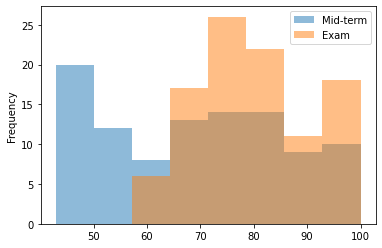

In [9]:
## Use Pandas method to plot a histogram for multiple columns
import pandas as pd

sData = pd.read_excel('StudentData.xlsx')   ## read the Excel file into sData
sData[['Mid-term', "Exam" ]].plot.hist(bins=8, alpha=0.5)


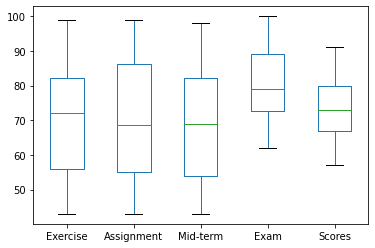

In [10]:
## Use Pandas method to plot a box chart
import pandas as pd

sData = pd.read_excel('StudentData.xlsx')   ## read the Excel file into sData
sData["Scores"] = round(sData["Exercise"] * 0.1 + sData["Assignment"] * 0.2 + \
                  sData["Mid-term"] * 0.3 + sData["Exam"] * 0.4, 0)

## Plot the pie chart accordingly
sData[["Exercise", "Assignment", "Mid-term", "Exam", "Scores"]].plot.box()

--------------------
<h3 style="color:SlateBlue;"><b>Saving Your Works to either .csv or .xlsx files</b></h3>

-------------------

In [1]:
## Writing to a .xlsx file
import pandas as pd
import os

sData = pd.read_excel('StudentData.xlsx')      # read the Excel.xlsx file into sData
sData["Scores"] = round(sData["Exercise"] * 0.1 + sData["Assignment"] * 0.2 + \
                  sData["Mid-term"] * 0.3 + sData["Exam"] * 0.4, 0)

sumRow = sData[["Exercise", "Assignment", "Mid-term", "Exam"]].sum()

dfSum = pd.DataFrame(data=sumRow).T             # transpose
dfSum = dfSum.reindex(columns=sData.columns)    # convert to dataFrame
dfNew = sData.append(dfSum, ignore_index=False) # append to existing data
dfNew = dfNew.rename(index={0:"Sum"})           # rename the row as Sum
print(dfNew.tail(), "\n")

## write to Excel file
if os.path.isfile("Students_new.xlsx"):
    os.remove("Students_new.xlsx")              # Ensure that the file not exists
    
dfNew.to_excel("Students_new.xlsx")


        SID    Name  DOM  Exercise  Assignment  Mid-term  Exam  Scores
96   B79507    Levi  2.0        56          93        64    95    81.0
97   B92485    Lily  2.0        55          47        86    63    66.0
98   B76960    Maya  1.0        71          58        56    74    65.0
99   B79775  Peyton  7.0        83          59        83    76    75.0
Sum     NaN     NaN  NaN      7039        6983      6883  8048     NaN 



In [1]:
## Verify the works of write to an Excel (.xlsx) file
## Writing to a .xlsx file
import pandas as pd

newData = pd.read_excel('Students_new.xlsx')   ## read the Excel.xlsx file into sData
newData.tail()

,Unnamed: 0,SID,Name,DOM,Exercise,Assignment,Mid-term,Exam,Scores
96,96,B79507,Levi,2.0,56,93,64,95,81.0
97,97,B92485,Lily,2.0,55,47,86,63,66.0
98,98,B76960,Maya,1.0,71,58,56,74,65.0
99,99,B79775,Peyton,7.0,83,59,83,76,75.0
100,Sum,NaN,NaN,NaN,7039,6983,6883,8048,NaN


In [2]:
## Writing to a .csv file
import pandas as pd
import os

sData = pd.read_excel('StudentData.xlsx')   ## read the xlsx file into sData
sData["Scores"] = round(sData["Exercise"] * 0.1 + sData["Assignment"] * 0.2 + \
                  sData["Mid-term"] * 0.3 + sData["Exam"] * 0.4, 0)

sumRow = sData[["Exercise", "Assignment", "Mid-term", "Exam"]].sum()

dfSum = pd.DataFrame(data=sumRow).T             # transpose
dfSum = dfSum.reindex(columns=sData.columns)    # convert to dataFrame
dfNew = sData.append(dfSum, ignore_index=False) # append to existing data
dfNew = dfNew.rename(index={0:"Sum"})           # rename the row as Sum
print(dfNew.tail(), "\n")

## write to Excel file
if os.path.isfile("Students_new.csv"):
    os.remove("Students_new.csv")              # Ensure that the file not exists
    
dfNew.to_csv("Students_new.csv")


        SID    Name  DOM  Exercise  Assignment  Mid-term  Exam  Scores
96   B79507    Levi  2.0        56          93        64    95    81.0
97   B92485    Lily  2.0        55          47        86    63    66.0
98   B76960    Maya  1.0        71          58        56    74    65.0
99   B79775  Peyton  7.0        83          59        83    76    75.0
Sum     NaN     NaN  NaN      7039        6983      6883  8048     NaN 



In [3]:
## Verify the works of write to Excel (.csv) file
## Writing to an .csv file
import pandas as pd

newData = pd.read_csv('Students_new.csv')   ## read the csv file into sData
newData.tail()


,Unnamed: 0,SID,Name,DOM,Exercise,Assignment,Mid-term,Exam,Scores
96,96,B79507,Levi,2.0,56,93,64,95,81.0
97,97,B92485,Lily,2.0,55,47,86,63,66.0
98,98,B76960,Maya,1.0,71,58,56,74,65.0
99,99,B79775,Peyton,7.0,83,59,83,76,75.0
100,Sum,NaN,NaN,NaN,7039,6983,6883,8048,NaN


---------------------------------------------------
<h3 style="color:blue;"><b>Student Practice #1</b></h3>
<p style="color:SlateBlue;">In the empty cells below, the perform the following accordingly.</p>
<ol style="color:DodgerBlue;">
    <li>Create your dataframe with the following data as specified:</li>
    <table style="color:orange;">
        <tr>
            <th style="text-align:left;width:120px;">SID</th>
            <th style="text-align:left;width:200px">Supervisor</th>
        </tr>
        <tr>
            <td style="text-align:left;">S01</td>
            <td style="text-align:left;">Rebecca Chao</td>
        </tr>
        <tr>
            <td style="text-align:left;">S02</td>
            <td style="text-align:left;">Desmond Tung</td>
        </tr>
        <tr>
            <td style="text-align:left;">S03</td>
            <td style="text-align:left;">Dennis Kun</td>
        </tr>
        <tr>
            <td style="text-align:left;">S04</td>
            <td style="text-align:left;">Alexandra Chow</td>
        </tr>
        <tr>
            <td style="text-align:left;">S05</td>
            <td style="text-align:left;">Pong Shiu</td>
        </tr>
        <tr>
            <td style="text-align:left;">S06</td>
            <td style="text-align:left;">Iris Wong</td>
        </tr>
        <tr>
            <td style="text-align:left;">S07</td>
            <td style="text-align:left;">Never Law</td>
        </tr>
    </table>
    <li>Input the Agents file (either .csv or .xlsx)</li>
    <li>Link the Agents dataframe with your supervisor dataframe on the SID</li>
    </ol>

---------------------------------------------------

In [ ]:
## Create your dataframe on the run
........


In [ ]:
## Link your agents file with the dataframe created on the run
........


In [ ]:
## Verify the correctness of your work (i.e. the merge of the two dataframes)
........


--------------
<h3 style="color:blue;"><b>Student Practice #2</b></h3>
<p style="color:SlateBlue;">In the empty cell below, perform the follow works as specified.</p>
<ol style="color:DodgerBlue;">
    <li>Determine the annual sales for each of the agent.</li>
    <li>Perform the appraisal for each of the agent according to the following:</li>
    <table style="color:orange;">
        <tr>
            <th style="text-align:left;width:180px;">Annual Sales</th>
            <th style="width:120px;">Apprasial</th>
        </tr>
        <tr>
            <td style="text-align:left;">over 2.0M</td>
            <td>Excellent</td>
        </tr>
        <tr>
            <td style="text-align:left;">[1.5M ~ 2.0M)</td>
            <td>Good</td>
        </tr>
        <tr>
            <td style="text-align:left;">[1.0M ~ 1.5M)</td>
            <td>Fair</td>
        </tr>
        <tr>
            <td style="text-align:left;">less than 1.0M</td>
            <td>Poor</td>
        </tr>
    </table>
    </ol>
    
--------------

In [ ]:
## Determine both the annual sales and apprasial for the dataframe that contains data from Agents
..............


--------------
<h3 style="color:blue;"><b>Student Practice #3</b></h3>
<p style="color:SlateBlue;">In the empty cells below, perform the followings:</p>
<ol style="color:DodgerBlue;">
    <li>Determine the sum for all the numerical columns.</li>
    <li>Determine the average for all the numerical columns.</li>
    <li>Append the sum and average of all the nuerical columns onto your existence dataframe.</li>
    <li>Save the works (i.e. the original dataframe with the rows that for sum and average of all numerical columns) to "Agents_new.xlsx".</li>
    <li>Verify the correctness of your works.</li>
    </ol>
    
----------------    


In [ ]:
## Determine the sum and average of all the numerical columns from the Agents file
.........


In [ ]:
## Append the sum and average of all the numerical columns
........


In [ ]:
## Save the new dataframe (i.e with the append of sum and average rows)
........


In [ ]:
## Verify the correctness of your works
........



--------------
<h3 style="color:blue;"><b>Student Practice #4</b></h3>
<p style="color:SlateBlue;">In the empty cells below, freely generate the histogram or box chart for the numerical columns (i.e. Q1, Q2, Q3, Q4, and/or Annual Sales).</p>

------------------